# Linear Regression
- 수치예측

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

DF = sns.load_dataset('mpg')

자동차 연비(mpg) 데이터
 - mpg : miles per gallon
- 1 mile : 1.6 Km
- 1 gallon : 3.78 Liter

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


# 단순 회귀

In [5]:
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


# 상관관계 그래프

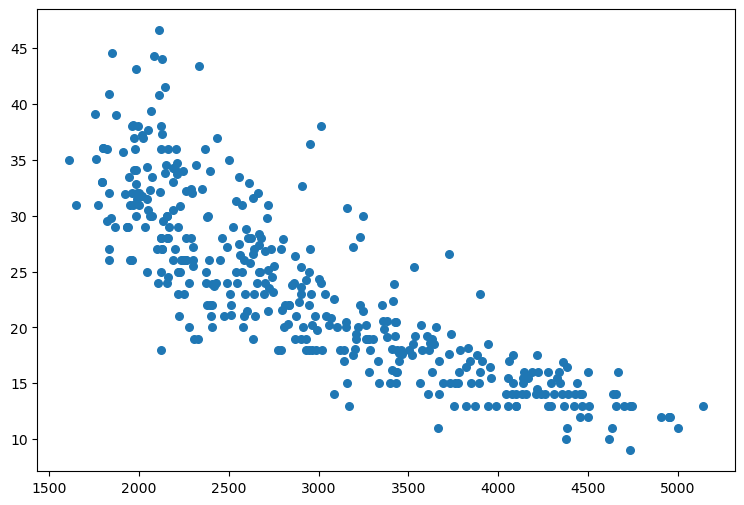

In [8]:

import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

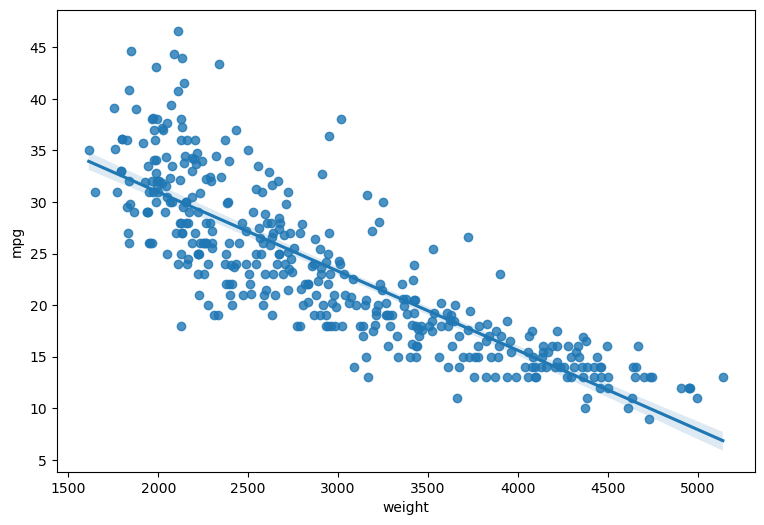

In [9]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = True)
plt.show()

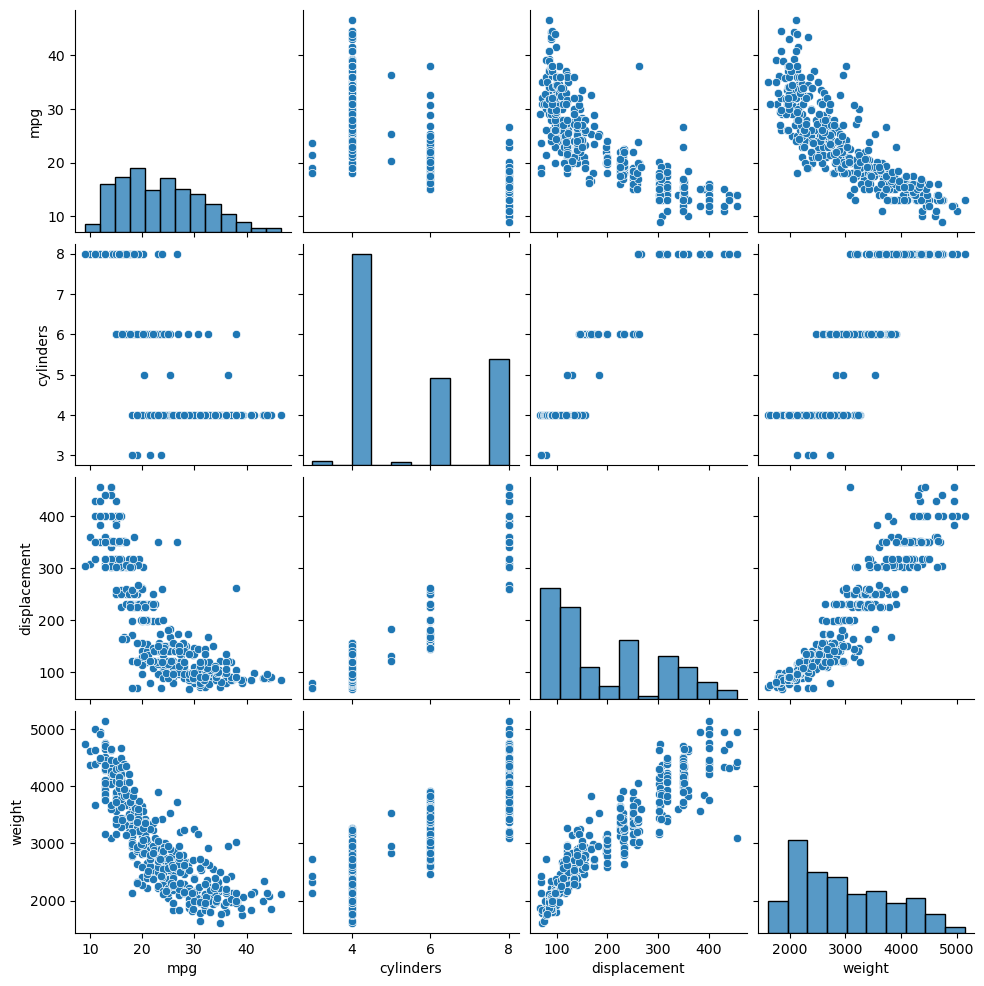

In [10]:
sns.pairplot(DF1)  
plt.show()

# 상관계수(Correlation Coefficient)

## mpg vs. weight

In [12]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.weight)[0]

-0.831740933244335

## mpg vs. displacement

In [13]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.804202824805898

## mpg vs. cylinders

In [14]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205543

# Train & Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


# 선형회귀 Modeling

In [16]:
from sklearn.linear_model import LinearRegression

SR = LinearRegression()
SR.fit(X_train, y_train)

LinearRegression()

## Weight 및 Bias

In [17]:
print('weight(w) : ', SR.coef_)
print('bias(b) : ', SR.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.28223639092363


## 결정계수(R-Sqaure)

In [18]:
SR.score(X_test, y_test) # 데이터를 얼마나 잘 성명하고 있는가

0.7164499678296495

# 모델 평가

In [20]:
from sklearn.metrics import mean_squared_error

y_hat_Xtest = SR.predict(X_test)

mean_squared_error(y_test, y_hat_Xtest)

17.01518447782976

# Visualization

## y vs. y_hat

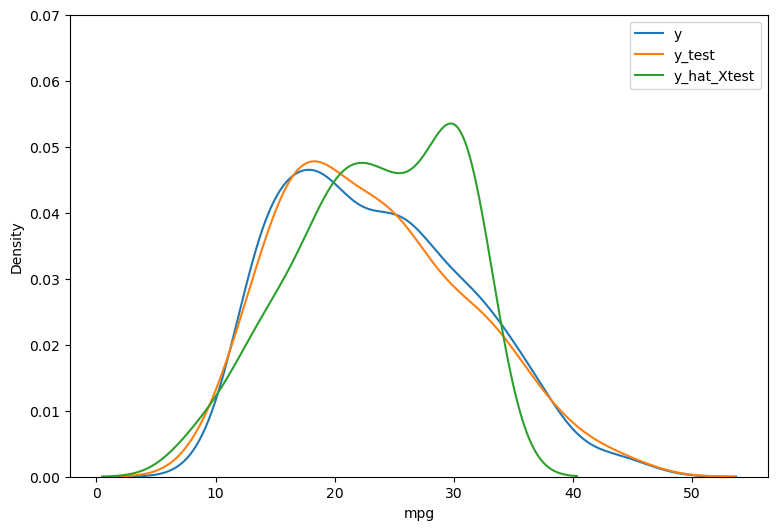

In [23]:
# 실제 정답데이터와 테스트셋 예측값에 대한 분포를 비교해보자
SR_y = y
SR_y_test = y_test
SR_y_hat_Xtest = SR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
ax2 = sns.distplot(SR_y_test, hist = False, label='y_test', ax = ax1) #  테스트셋 종속변수(정답데이터)의 분포
ax3 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1) # 테스트셋 독립변수(미훈련한 30%의 설명데이터)에 대한 회귀예측값의 분포

plt.legend()
plt.ylim(0, 0.07)
plt.show()

# 다항 회귀

In [24]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


# Train & Test Split

In [26]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


# 선형회귀 Modeling

## 2차 다항식 변환

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train) # X전체로 fit하면 안됨, 정답을 미리 알려주는 꼴

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


In [30]:
from sklearn.linear_model import LinearRegression

PR = LinearRegression()
PR.fit(X_train_poly, y_train)

LinearRegression()

## Weight 및 Bias

In [31]:
import numpy as np
np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', PR.coef_)
print('bias(b) : ', '%.8f' % PR.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


## 결정계수(R-Sqaure)

In [33]:
X_test_poly = poly.transform(X_test)

PR.score(X_test_poly, y_test)

0.7525521808321769

# 모델 평가

In [35]:
from sklearn.metrics import mean_squared_error

# X_test_poly = poly.fit_transform(X_test)

mean_squared_error(y_test, PR.predict(X_test_poly))

14.848773810921925

# Visualization

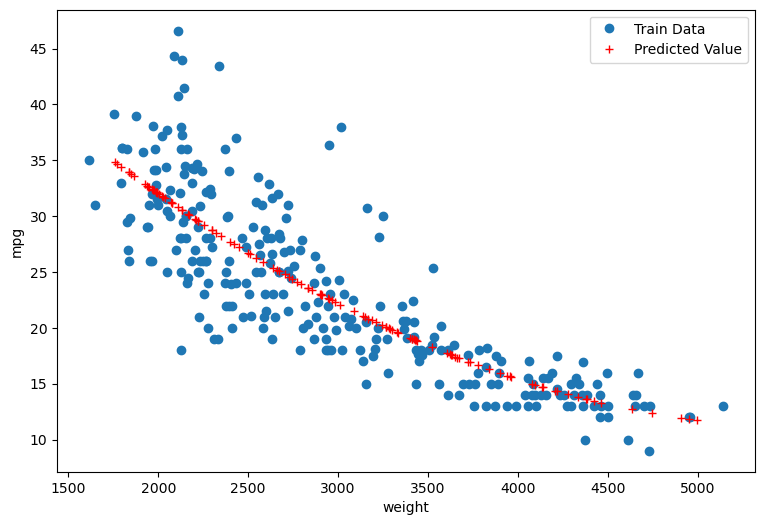

In [37]:
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, PR_y_hat_Xtest, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

## y vs. y_hat

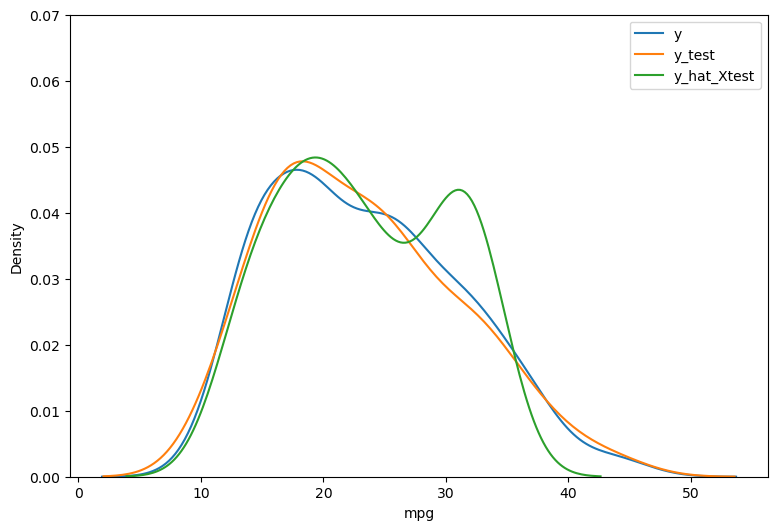

In [40]:

PR_y = y
PR_y_test = y_test
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(PR_y, hist=False, label="y")
ax2 = sns.distplot(PR_y_test, hist=False, label="y_test", ax=ax1)
ax3 = sns.distplot(PR_y_hat_Xtest, hist=False, label="y_hat_Xtest", ax=ax1)

plt.legend()
plt.ylim(0, 0.07)
plt.show()

# 다중 회귀

In [42]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


# Train &Test Split

## 7:3

In [ ]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

# 다중회귀 Modeling

In [45]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()   
MR.fit(X_train, y_train)

LinearRegression()

## Weight 및 Bias

In [47]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0076616779]
bias(b) :  46.28223639


## 결정계수(R-Sqaure)

In [48]:
MR.score(X_test, y_test)

0.7164499678296495

In [49]:
# 다중회귀모형은 조정된 결정계수를 봐야한다.
# sklean lR에서 기능을 제공하지 않으므로 추가 계산을 해야함  또는 statsmodel api를 활용할 수있음
1 - (1-MR.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7140470014553245

# 모델 평가

In [51]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

17.01518447782976

# Visualization

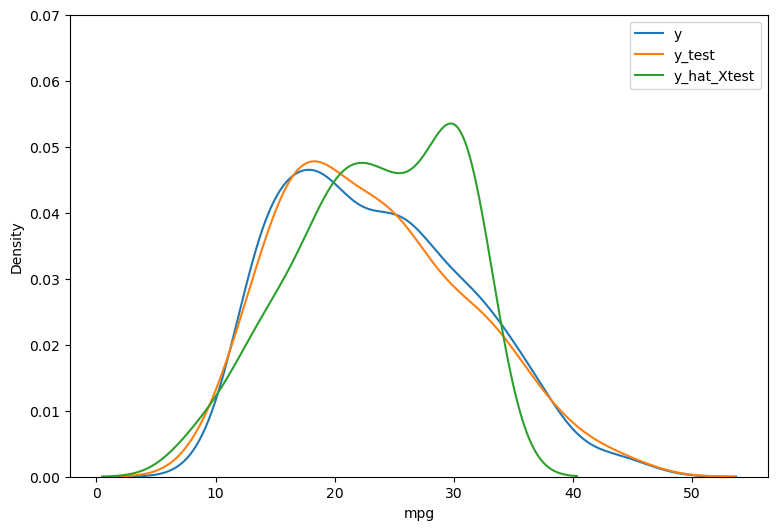

In [53]:
MR_y = y
MR_y_test = y_test
MR_y_hat_Xtest = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(MR_y, hist = False, label = 'y')
ax2 = sns.distplot(MR_y_test, hist = False, label = 'y_test')
ax3 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1)

plt.ylim(0, 0.07)
plt.legend()
plt.show()

# 비교 시각화

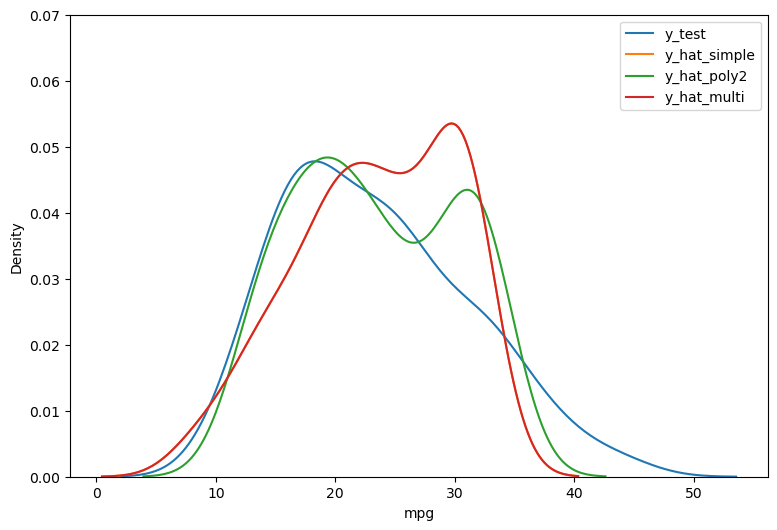

In [55]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_simple', ax = ax1) # 단순회귀
ax3 = sns.distplot(PR_y_hat_Xtest, hist = False, label='y_hat_poly2', ax = ax1) # 다항회귀 2차
ax4 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_multi', ax = ax1) # 다중회귀
plt.legend()
plt.ylim(0, 0.07)
plt.show()

# 회귀분석 연습하기 
의료비 지출 예측 모델링

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
!pip install statsmodels 

^C


In [59]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
DF.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


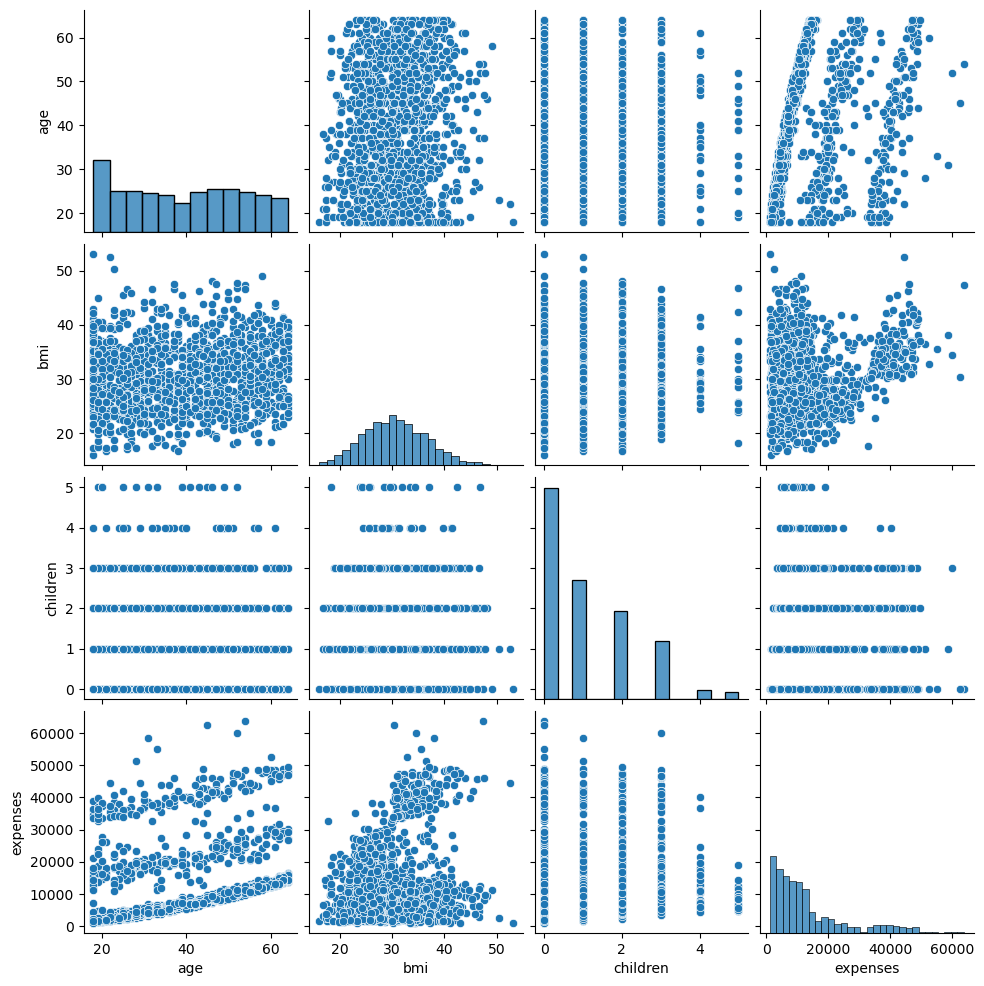

In [64]:
sns.pairplot(DF)  
plt.show()

# 전체 의료비 분포

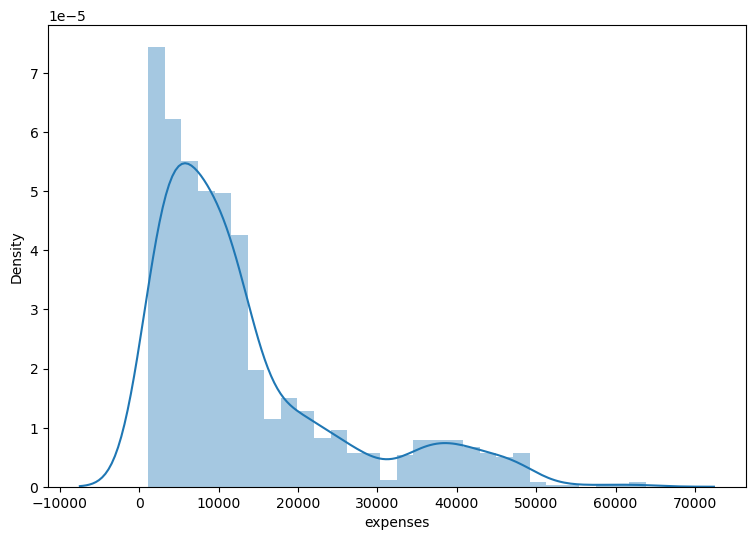

In [65]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.expenses,hist = True,kde = True)
plt.show()

# 성별 별 의료비 분포

In [67]:
DF.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

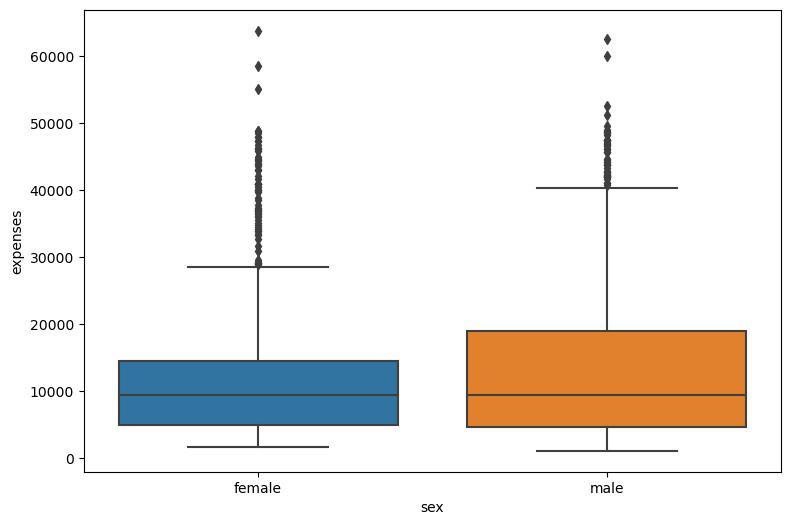

In [66]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

# 자녀수 별 의료비 분포

In [69]:
DF.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

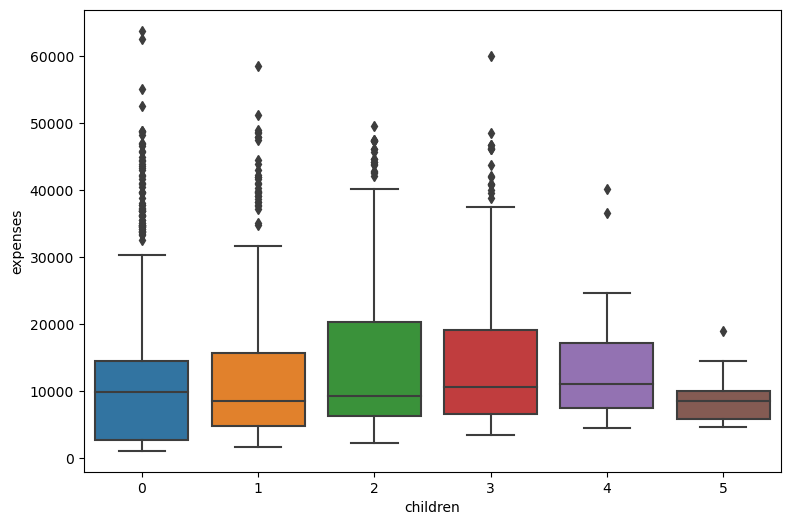

In [70]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'children', y = 'expenses', data = DF)
plt.show()

# 흡연여부 별 의료비 분포

In [71]:
DF.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

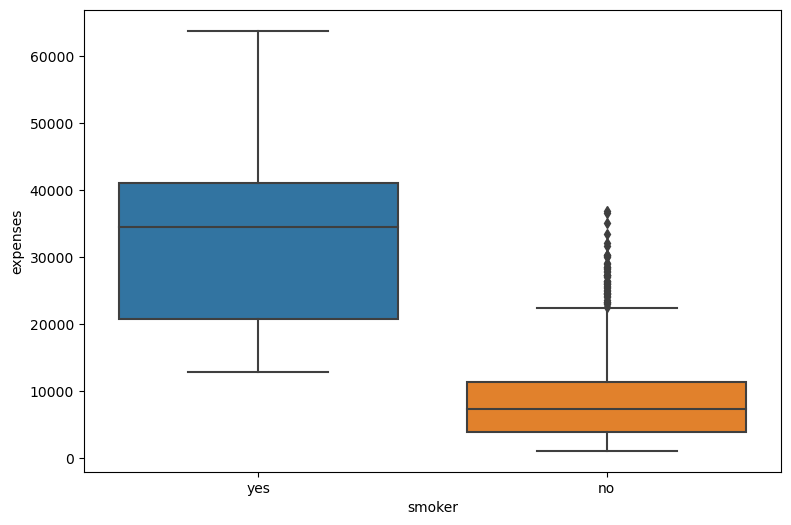

In [72]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'smoker', y = 'expenses', data = DF)
plt.show()

# 거주지역 별 의료비 분포

In [75]:
DF.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

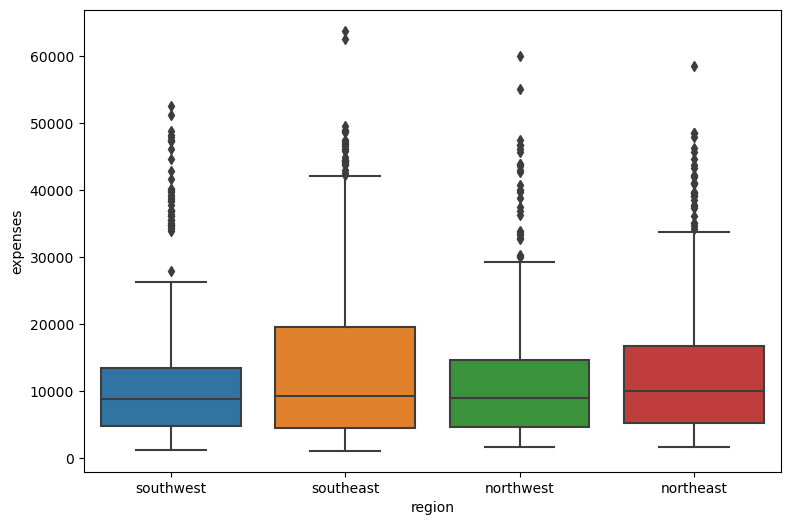

In [74]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'region', y = 'expenses', data = DF)
plt.show()

# BMI 분포 및 의료비와의 관계

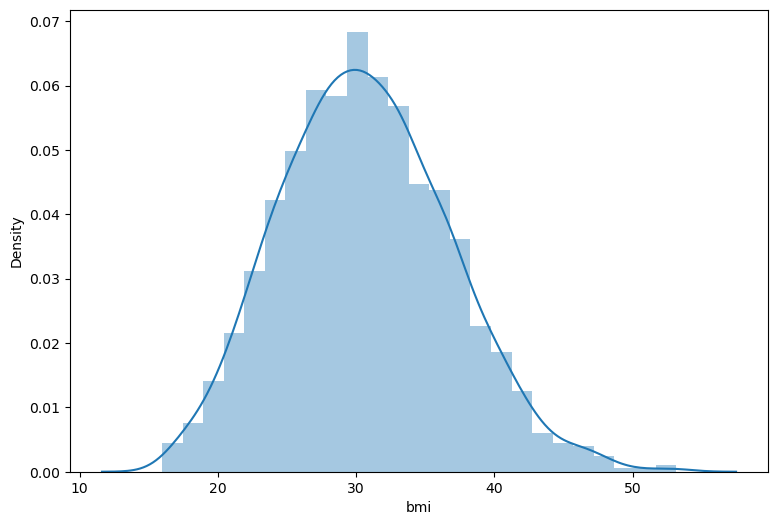

In [76]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.bmi,
             hist = True,
             kde = True)
plt.show()

# BMI와 의료비 간의 관계

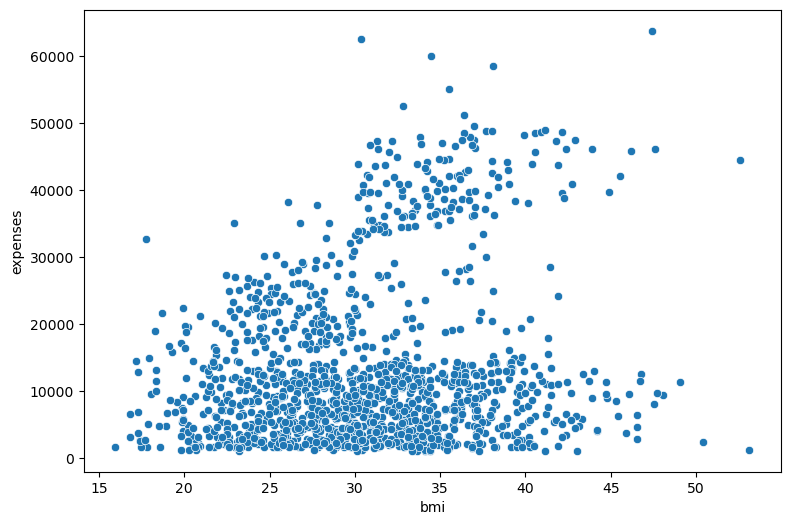

In [78]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = DF.bmi, y = DF.expenses)
plt.show()

# Logistic Regression

# Sigmoid (Actication) Function

In [81]:
import warnings
warnings.filterwarnings('ignore')

# sigmoid( ) 정의

In [84]:
import numpy as np

def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

In [85]:
sigmoid(0)

0.5

In [86]:
sigmoid(100000000)

1.0

In [87]:
sigmoid(-100000000)

0.0

# sigmoid( ) 시각화

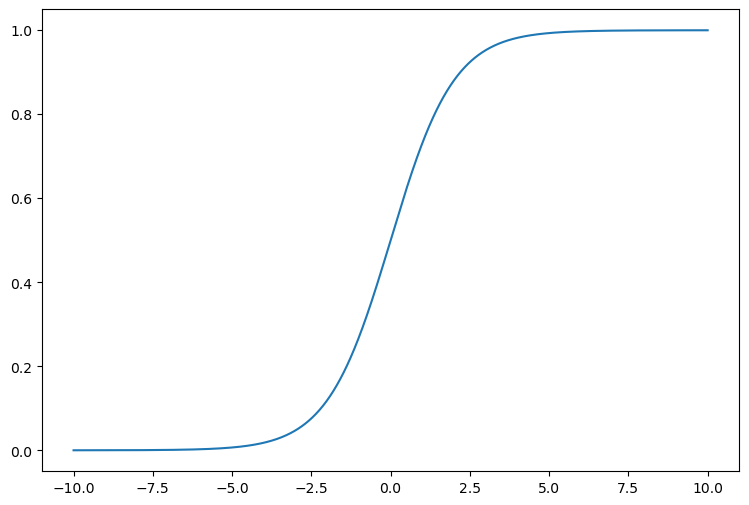

In [89]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()